<a href="https://colab.research.google.com/github/Park5957/ai/blob/main/Day7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
# 이진 탐색법
# 17찾기
arr = [11,13,17,19,23,29,31]
head = 0
tail = int(len(arr)-1)

while head<=tail :
  center = int((head+tail)/2)
  if arr[center] == 17 :
    print(f"17의 배열위치는 {head}입니다.")
    break
  elif arr[center] < 17:
    head= center+1
  elif arr[center] > 17:
    tail= center-1
  

17의 배열위치는 2입니다.


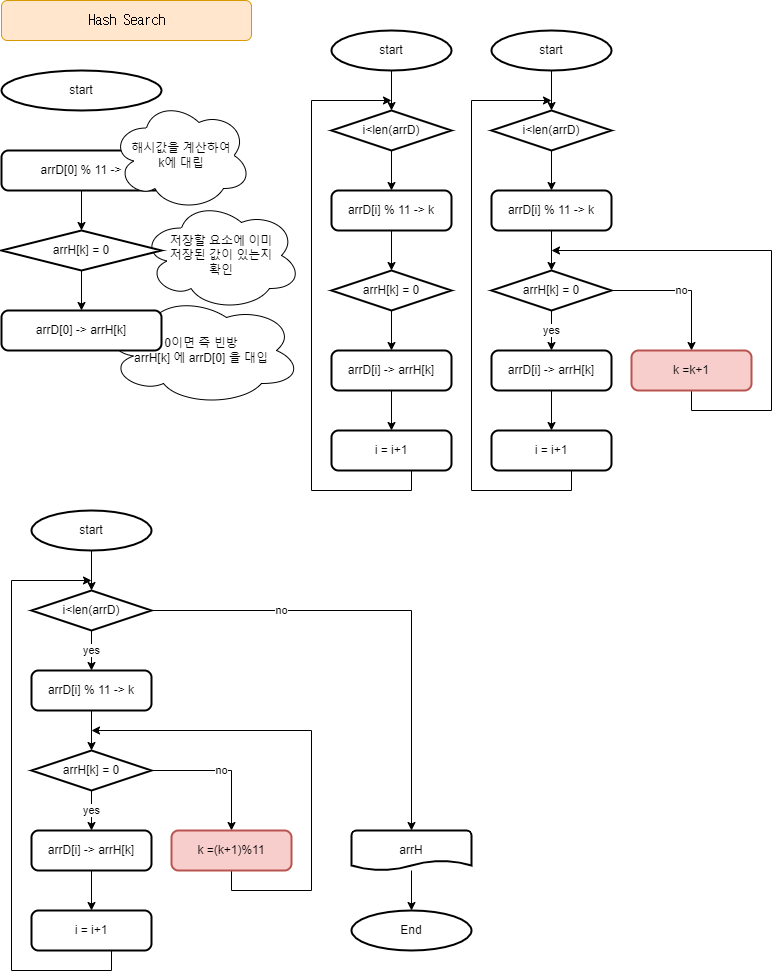

In [ ]:
###############
# Hash Search 
###############

# 선형 탐색이나 이진 탐색의 전제 조건은 어떤 데이터가 어떤 요소(index)에 있는지
# 전혀 모르는 상태에서 검색을 시작한다는 것이다.
# 그러나 Hash Search 은 데이터의 "내용"과 저장한 곳의 "요소" 를 미리 저장할때
# 연계를 해서 극히 짧은 시간안에 탐색할 수 있도록 고안된 알고리즘이다.

# 24 인 데이터는 첨자 24에 넣어두고 36인 데이터는 첨자 36에 넣어두는 것이다.
# 단, 위 두 수를 저장하기 위해 배열의 빈공간 35개가 발생을 한다.(총 37개의 배열)
# 즉, 데이터의 누수가 발생하게 된다.

# Hash Search 의 특징은 나중에 데이터를 쉽게 찾도록 보관하는 단계에서 사전 준비를
# 해두는 것이 특징이다.

# [11,15,23,26]
# 가장 알기 쉬운 방법은 데이터를 데이터의 숫자와 같은 방에 넣어두는 것이다.
# 하지만 메모리의 불필요한 누수가 커진다.
# 따라서, 먼저 방을 7개을 준비한다. index 0 ~ index 6

# 11 15 23 26
# 11%7(만든 방의 index의 수) =(나머지는) 4
# 15%7(만든 방의 index의 수) =(나머지는) 1
# 23%7(만든 방의 index의 수) =(나머지는) 2
# 26%7(만든 방의 index의 수) =(나머지는) 5

# index num 0  1  2  3  4  5  6
#              15 23    11 26
# 위와같은 계산을 통해 공통요소를 찾아 지정하면 된다.
# 각각의 데이터를 나머지 값과 같은 번호의 방에 넣어 둔다.
# 데이터를 넣은 방의 번호를 계산한 식은
#         해시값 -> 방번호 = 데이터 % 7(방의갯수) <- 해시함수

# Hash Search 으로 데이터를 찾는 방법
# 11이라는 데이터를 찾아보자. 찾을때도 저장할때 사용한 해시 함수를 다시 사용한다.
# 저장할때의 계산식은 "데이터 값 %7" 이고 해시값은 4이며, index 번호를 나타낸다.

# 따라서 Hash Search 을 사용한다면 단 한번의 계산으로 찾고자 하는 것을 찾을 수 있다.
# 검색 시간을 단툭시키기 매우 좋은 방식이라는 것이 장점이다.

# 해시 함수로 데이터를 보관하는 알고리즘
# 해시 함수는 데이터의 저장소 첨자를 계산한다.
# 저장소의 첨자가 겹치는 것을 "충돌" 이라고 한다.
# 충돌이 발생하면 옆의 빈 요소에 데이터를 보관한다.(해시값+1)

# 1. 배열을 2개를 준비한다.
# ExampleData     [12,  25,  36,  20,  30,  8,  42]
# TemporaryArray  [0,   1,   2,   3,   4,   5,  6 ] // ExampleData의 array파악
# TemporaryArray2 [0,0,0,0,0,0,0,0,0,0,0] (실제 저장될 Array(11개))

# array 첫번째 요소부터 순차적으로 hash값을 계산하여 TemporaryArray2 로 저장한다.
# TemporaryArray2 의 요소수가 11개 임으로 11로 나눈 나머지를 계산하여 저장한다.

# Hash값=ExampleData % 11(Hash함수)
# ExampleData[0] = 12 임으로 12 % 11 == 1 이 된다.
# 따라서 TemporaryArray2[1] = 12 가 된다.

# 이미 다른 데이터가 할당 되어 있는지 확인하여 비어 있으면 대입한다.
# TemporaryArray2 데이터가 0 이라면 비어있는 것임으로 이것이 가장 확실한
# 방법이다.

ExampleData = [12,25,36,20,30,8,42]     # 예시 리스트
a = 0                                   # ExampleData 의 배열번호
TemporaryArray = [0]*11                 # 삽입될 11개의 0(빈공간) 배열
b = ExampleData[a]%len(TemporaryArray)  # 최초 ExampleData 배열의 삽입위치 특정
for i in range(len(TemporaryArray)) :   # for문을 삽입 배열만큼 구동
  
  if TemporaryArray[b] == 0 :           # 해당 위치가 0(빈공간)인지 확인
    TemporaryArray[b] = ExampleData[a]  # 맞다면 빈공간에 데이타 입력
    a += 1                              # ExampleData 의 배열번호 증가
    b = ExampleData[a]%len(TemporaryArray) # 증가된 데이터의 삽입번호 재특정
  elif TemporaryArray[b] != 0 :         # 삽입위치 배열에 값 존재 확인
    b = b + 1                           # 사입배열 값 1 증가
  if b == len(TemporaryArray)-1 and TemporaryArray[b] != 0 :
                                        # 1. 입력 배열의 값이 마지막인지 확인
                                        # 2. 해당배열에 값이 존재하는지 확인
    b = (b+1)%11                        # 사입배열번호 초기화
    if b == 0 :                         # 초기화된 삽입 배열 위치가 0인지 확인
      TemporaryArray[b] = ExampleData[a]# 초기화된 삽입 배열 위치에 삽입
    else :                              # 초기화된 삽입 위치가 0이 아닐시
      b +=1                             # 사입배열 값 1 증가
  
print(TemporaryArray)

# 충돌에 대하여
# 충돌이 너무 자주 일어나면 추가적인 처리가 많이 필요하게 된다.
# 해시탐색법의 장점이 무색해진다.
# 충돌이 일어나지 않게 하려면 데이터가 많이 흩어지도록 해야한다.

# 요소가 많아질수록 충돌의 가능성은 적어지지만 메모리의 사용량이 늘어나
# 알고리즘의 효율성이 떨어지게 된다.

# 탐색 처리의 속도를 유지는 것과 가능한 메모리를 적게 사용하는 요소의 수는
# 일반적으로 저장 데이터 수의 1.5배에서 2배라고 알려져 있다.

# 공간이 부족해 진다면 배열의 공간을 하나 더 증가시켜서 처리하면 된다.
# 다만 위 b의 값이 10을 초과한다고 해서 10을 초과하는 경우를 별도로 준비하는 것은
# 비효율 적이다.

# b가 10을 넘어 11이 된다면 나머지가 0이 되어(11%11 = 0 )
# 이렇게 함으로 맨 앞으로 보낼 수 있게 된다.
# 그곳이 0(빈공간)이 아니라도 하더라도 0(빈공간)이 나올 때 까지 찾아 올라가면 된다.

[42, 12, 0, 25, 36, 0, 0, 0, 30, 20, 8]


In [ ]:
# 저장할때 충돌이 일어났던 36을 검색해 보자

# x에 36을 입력하면 해시 값은 3을 얻게 된다
# arrH[3] 이미 25 라는 다른 데이터가 존재하고 있다.
# 0  1  2  3  4  5  6  7  8  9  10
# 42 12 0  25 36 0  0  0  30 20 8 
#          --
# 이것은 찾고 있는 데이터 36이 아니다. 이럴경우 저장했을 때와 마찮가지로
# k를 하나 증가시켜 옆자리를 찾으면 된다.
# 저장할 때 사용한 k가 10을 넘어도 문제가 생기지 않도록 미리 (k+1)%11을
# 설정해야 한다.

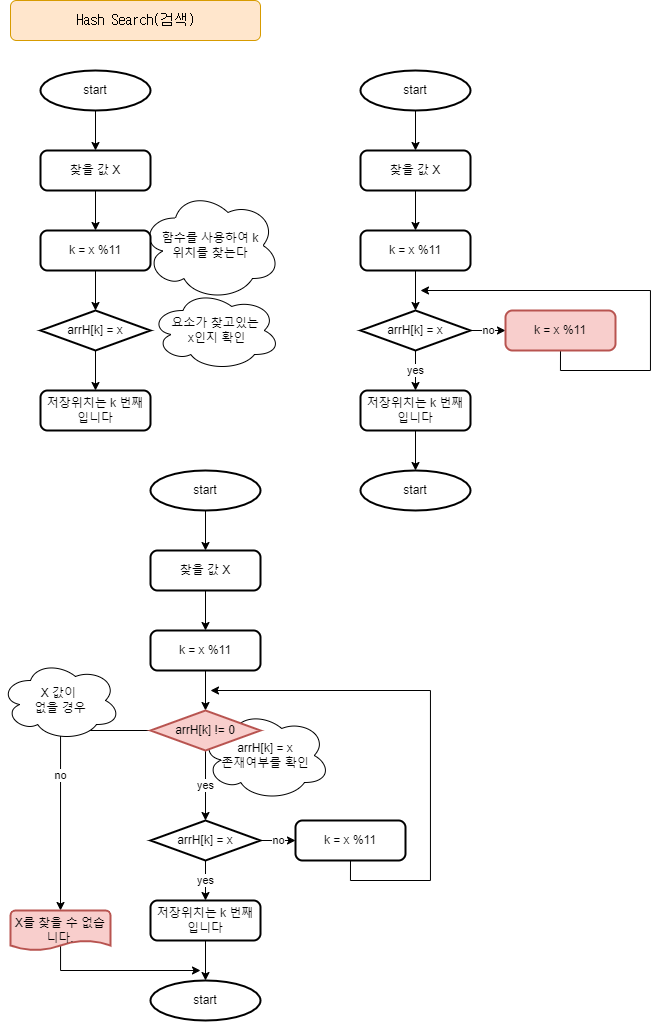

In [ ]:
# 검색하고 있는 데이터가 존재하지 않을 경우
# 찾는 데이터가 존재하지 않는 경우 무한 루프가 발생된다.

# 탐색 데이터가 발견되지 않으면 k값을 점점 증가하다가 다시 처음 부터 검색하고 이 과정이 계속 반복된다.
# 중단을 위해서는 데이터가 보관되지 않은 요소(값이 0인 요소) 가 나왔을 때를 기준으로 멈추면 된다.

# 만약 데이터가 존재한다면 설사 저장할 때 충돌이 발생하여 어딘가 다른 요소에 저장되어 있다 하더라도
# 저장 위치를 찾을 때 까지의 사이에 데이터가 0인 요소는 있을 수 없다.

sc = int(input("찾는 값을 입력해 주시기 바랍니다."))
arry = [42,12,0,25,36,0,0,0,30,20,8]
k = sc%len(arry)                                # Hash 입력 저장위치 특정
while True :                                    # 값을 찾기 위한 반복진행
  if arry[k] != 0 :                             # 특정 위치가 0(빈공간)인지 확인
    if arry[k] == sc :                          # 특정 위치가 찾는 값인지 확인
      print(f"저장위치는 {k}번 index 입니다.")
      break
    elif arry[k] != sc :                        # 찾는 값이 아닐경우
      k = k+1                                   # 특정 위치+1
      if k >= len(arry) :                       # 특정 위치 값이 인덱스 값을 넘을시
        k = 0                                   # 특정 위치 인덱스 값 초기화
      
  elif arry[k] == 0 :                           # 반복 이후에도 찾지 못할시 정지
    print("찾는 숫자가 없습니다.")
    break
  

찾는 값을 입력해 주시기 바랍니다.20
저장위치는 9번 index 입니다.


In [ ]:
#################
# 예외 처리 고급
#################

# 프로그램을 개발하다 보면 수많은 소류를 만나게 된다. 또한 처름 프로그램을 개발했을 때
# 모든 오류를 예측하고 처리할수는 없다.
# 개발이 완료된 후에도 예측하지 못한 오류들이 계속 발생되기 때문에 유지보수가 필요하다.

# try:
#   예외 발생 가능성 있는 구문
# except:
#   예외가 발생했을 때 실행할 구문

# try:
#   예외 발생 가능성 있는 구문
# except 예외의 종류 as e(예외 객체를 활용할 변수 이름):
#   예외가 발생했을 때 실행할 구문
#   ex) print(e) 이와같이 작성시 발생한 에러의 명칭이 뜨게 된다.

try:
  num = int(input("정수입력"))
  print(num)
except Exception as e : #Exception 은 error 의 최상위 명령어다.
  print("type(Exception) : ",type(e))
  print("Exception : ", (e))
  

In [ ]:
# 예외 구분하기
# 에러종류
# Exception 전부
# KeyError.
# ValueError.
# SyntaxError.
# NameError.
# ZeroDivisionError.
# FileNotFoundError.
# TypeError.
# AttributeError.

list = [52,273,32,72,100]

try : 
  num = int(input("정수입력 : "))
  print(f"{num}번 배열 값은 {list[num]}번 입니다.")

except IndexError as e:
  print("인덱스에러 : ",e)

except ValueError as e:
  print("벨류에러 : ",e)

except Exception as e:
  print("예상못한 에러(또는 기타등등) : ",e)

# 치명적인 문제인데도 넘어가는 것이기 떄문에
# 나중에는 더 큰 문제가 될 수 있다.

# 예외 처리의 주 목적은 "이 코드에서 어떤 예외가 발생할 것인가?"
# 이며, 이를 잘 예측 하는 것이다.

In [ ]:
# 예외 강제로 발생시키기 raise

# num = int(input("정수입력 : "))

# if num > 0:
#   raise NotImplementedError

# else :
#   raise NotImplementedError

In [ ]:
#  모듈
#  여러 변수와 함수를 가지고 있는 집합체
#  파이썬에 기본적으로 내장되어 있는 모듈을 "표준 모듈" 이라고 부른다.
#  다른 사람이 만들어서 공개한 모듈을 "외부 모듈"이라고 부른다.

# math 모듈 - 수학과 관연된 기능들을 가진 모듈

import math

print(math.sin(1))
print(math.cos(1))
print(math.tan(1))

# ceil()  #올림
# floor() #내림
# round() #반올림

In [ ]:
from math import* # 이와같은 설정을 한다면 print에 math를 적을 필요가 없다.
from math import sin,cos,tan # 이처럼 필요한 것만 설정할 수 있다.
print(sin(1))
print(cos(1))
print(tan(1))

In [ ]:
import math as m # 이와 같은 방식을 쓴다면 math는 m으로 지정할 수 있다.
print(m.sin(1))
print(m.cos(1))
print(m.tan(1))

In [ ]:
# ! pip install selenium #(모듈명) 설치 완료한 뒤에는 주석으로 변경하면 된다.
import selenium

In [ ]:
# random 모듈 - 랜덤한 숫자를 생성해 주는 모듈
import random as r

print("rnadom 모듈")
# 기본적으로 0.0 에서 1.0 사이의 float 으로 난수를 발생시킨다.
print("- rnadom() : ", r.random())

# uniform(min,max) : 지정한 범위 사이의 float 을 발생시킨다.
print("- uniform(10,20) : ", r.uniform(10,20))

#  randrange(): 지정한 범위의 int 를 발생시킨다.
print("- randrange(10,20) : ", r.randrange(10,20))
print("- randrange(20) : ", r.randrange(20)) # 처음값은 생략 가능

# choice(list): 리스트 내부에 있는 요소를 랜덤하게 선택한다.
list = [1,2,65,78,6,1]
print("- choice(list) : ", r.choice(list))
# 직접 리스트 내용을 입력할 수 있다.
print("- choice([1,5,7,8,9,6]) : ", r.choice([1,5,7,8,9,6]))

# shuffle(list) : 리스트의 요소들을 랜덤하세 섞어준다.
# shuffle 은 사전에 섞어야만 출력할 수 있다. 이는 파괴적 처리를 하기 때문이다.
# print 내부에서 사용하여 출력하는 것은 불가능 하다.
r.shuffle(list)
print("- shuffle(list) : ", list)

# sample(list, k = 숫자 ) : 리스트의 요소중 k 개를 랜덤하게 뽑아준다.
print("- sample([1,5,7,8,9,6],k=2) : ", r.sample([1,5,7,8,9,6],k=2))

In [ ]:
# Q. 여러분은 로또 당첨 번호 추첨
import random as r
rotto = [ i for i in range(46)]
for i in range(5) :
  print(f"rotto 번호 {i} ", r.sample(rotto,k=5))

rotto 번호 0  [38, 17, 25, 19, 28]
rotto 번호 1  [39, 23, 8, 43, 37]
rotto 번호 2  [20, 19, 12, 18, 24]
rotto 번호 3  [40, 41, 20, 8, 17]
rotto 번호 4  [24, 45, 26, 20, 10]


In [ ]:
# os 모듈
import os
print("현재 운영체제", os.name)
print("현재 작업폴더", os.getcwd())
print("현재 폴더내부", os.listdir())

# os.mkdir("hello2")
# print("현재 폴더내부", os.listdir())
# os.rmdir("hello2")

b'\n<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84 \xeb\xa9\x94\xec\x9d\xb8\xec\x97\x90\xec\x84\x9c \xeb\x8b\xa4\xec\x96\x91\xed\x95\x9c \xec\xa0\x95\xeb\xb3\xb4\xec\x99\x80 \xec\x9c\xa0\xec\x9a\xa9\xed\x95\x9c \xec\xbb\xa8\xed\x85\x90\xec\xb8\xa0\xeb\xa5\xbc \xeb\xa7\x8c\xeb\x82\x98 \xeb\xb3\xb4\xec\x84\xb8\xec\x9a\x94"/> <meta property="og:title" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2
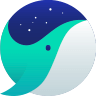
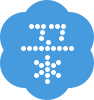

In [ ]:
# urllib 크롤링 등 웹 접근 라이브러리

# from urllib import request

# target = request.urlopen("https://www.naver.com")
# output = target.read()
# print(output) # 결과적으로 웹 사이트의 정보를 가지고 오는 작업

In [ ]:
# 외부모듈
# 파이썬이 기본적으로 제공해주는 것이 아니라 누군가가 만들어서 배포하는 모듈을 말한다.


# !pip install pybithumb 빗썸
import pybithumb as py
import time

# while True:
print(py.get_current_price("BTC")) #현재 비트코인 가격을 가지고 오는 method
print(py.get_current_price("ETH"))
  # time.sleep(1)
# tickers = py.get_tickers()
# print(tickers)
# 거래중이 비트코인의 이름
# for ticker in tickers:
#   pice= py.get_current_price(ticker)
#   print(ticker,pice)
#   time.sleep(1)
#  비크토인 종목,가격 출력

print(py.get_market_detail("BTC"))
# 저가, 고가, 평균, 거래량

52801000.0
3747000.0
(53309000.0, 54123000.0, 52214000.0, 52801000.0, 2930.49311619)
